# Introduction

### I have choosen a data set from kaggle it is about a super store in united states 

## Importing lib

In [1]:
# import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the csv file

In [2]:
# load data
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Checking for null values

In [3]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<a id='wrangling'></a>
## Data Wrangling

In [4]:
# check information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


No missing values and all data types are okay

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## checking for duplicate values

In [6]:
# check duplicated values
df[df.duplicated(keep=False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


### There are duplicated values so i will drop those values

In [7]:
# drop duplicated values
df.drop_duplicates(inplace=True)

### Checking unique values in country column

In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

#### In country column only united states is there so the postal code also same so i am going to drop those columns

In [9]:
# drop useless features like country because it contain only US and postal code
df.drop(['Country', 'Postal Code'], axis=1,inplace=True)

In [10]:
# look again to dataset
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## finding outliers

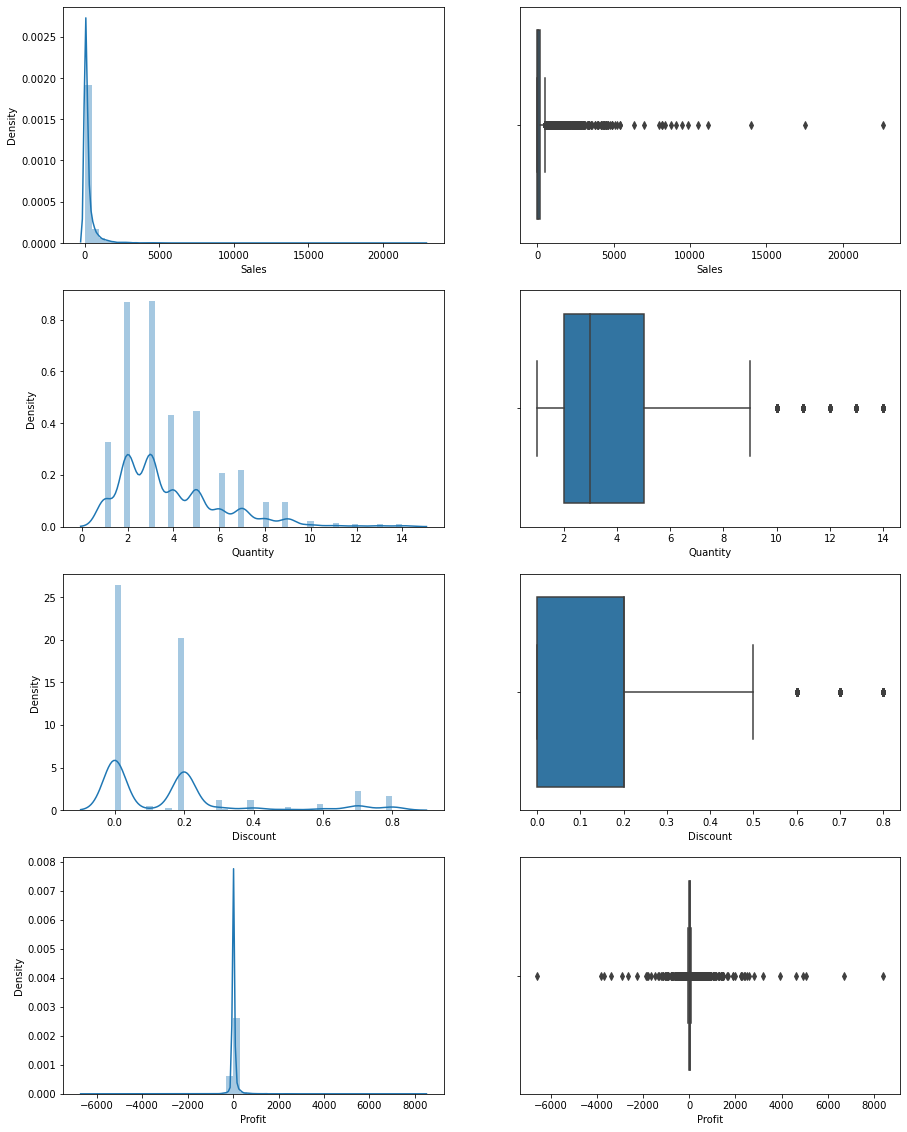

In [11]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(df['Sales'])
plt.subplot(4,2,2)
sns.boxplot(df['Sales'])
plt.subplot(4,2,3)
sns.distplot(df['Quantity'])
plt.subplot(4,2,4)
sns.boxplot(df['Quantity'])
plt.subplot(4,2,5)
sns.distplot(df['Discount'])
plt.subplot(4,2,6)
sns.boxplot(df['Discount'])
plt.subplot(4,2,7)
sns.distplot(df['Profit'])
plt.subplot(4,2,8)
sns.boxplot(df['Profit'])
plt.show()

## Finding IQR

In [12]:
percentile25 = df['Sales'].quantile(0.25)
print(percentile25)
percentile75 = df['Sales'].quantile(0.75)
print(percentile75)

17.3
209.97


In [13]:
print("Highest allowed",df['Sales'].mean() + 3*df['Sales'].std())
print("Lowest allowed",df['Sales'].mean() - 3*df['Sales'].std())
print("Highest allowed",df['Quantity'].mean() + 3*df['Quantity'].std())
print("Lowest allowed",df['Quantity'].mean() - 3*df['Quantity'].std())
print("Highest allowed",df['Discount'].mean() + 3*df['Discount'].std())
print("Lowest allowed",df['Discount'].mean() - 3*df['Discount'].std())
print("Highest allowed",df['Profit'].mean() + 3*df['Profit'].std())
print("Lowest allowed",df['Profit'].mean() - 3*df['Profit'].std())

Highest allowed 2101.3131284494407
Lowest allowed -1641.0153254425336
Highest allowed 10.470689560001427
Lowest allowed -2.889252254198079
Highest allowed 0.7756440348871556
Lowest allowed -0.4630871540612369
Highest allowed 732.0636501120109
Lowest allowed -674.683390996044


<a id='eda'></a>
## Exploratory Data Analysis

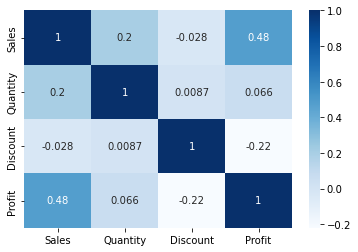

In [14]:
# check correlation
sns.heatmap(df.corr(), cmap="Blues",annot=True);

we notice there's correlation between (profit, discount) and (profit, sales) and (quantity, sales)

## Check profit, sales and discount

### For each region

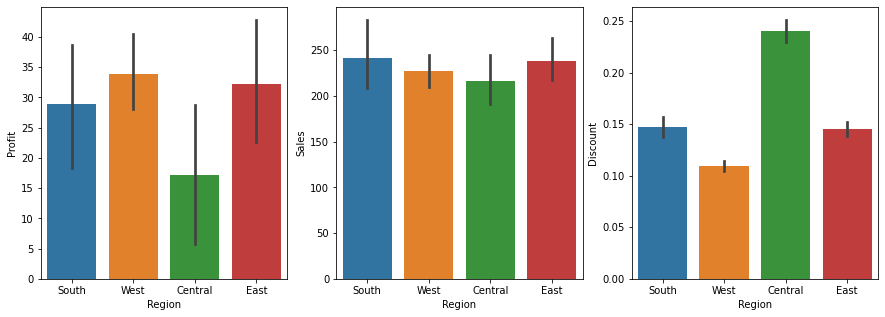

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Region', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Region', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Region', y='Discount', data=df, ax=ax[2])
plt.show()

- West region has the highest profit and find same region has the lowest discount
- South has the highest sales
- Central has the lowest profit and has the highest discount maybe that's the reason

### For each category

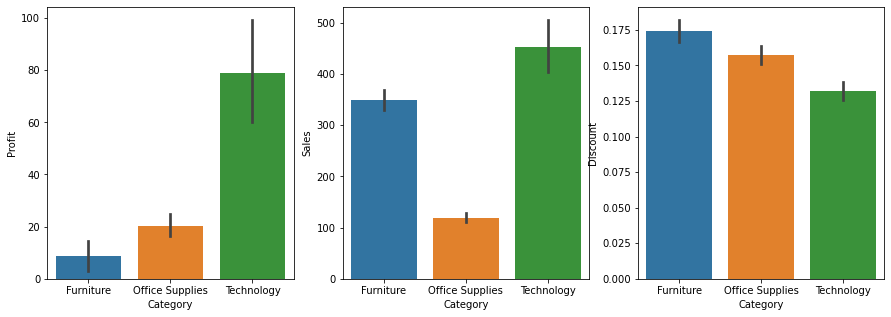

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Category', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Category', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Category', y='Discount', data=df, ax=ax[2])
plt.show()

- Furniture sales is high but has very low profit maybe high discount is the reason

### For each Segment

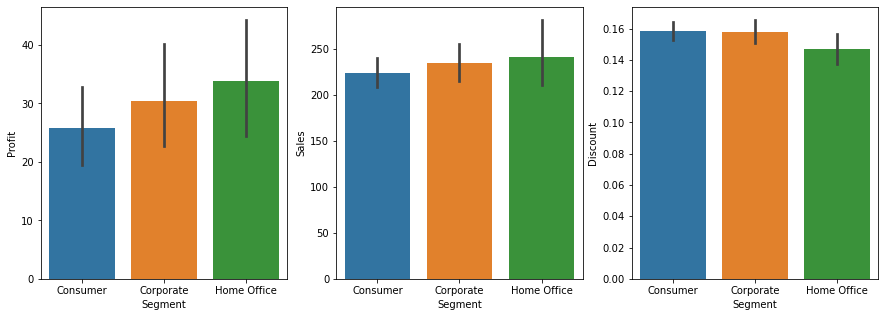

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Segment', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Segment', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Segment', y='Discount', data=df, ax=ax[2])
plt.show()

- Home Office has the lowest dicount but has also the highest profit as sales

### For each shipe mode

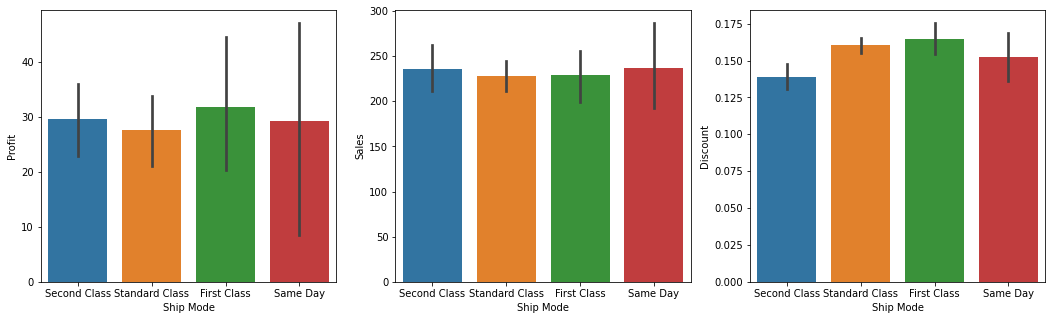

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='Ship Mode', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Ship Mode', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount', data=df, ax=ax[2])
plt.show()

- Same day shipping has the highest sales
- First class has highest discount but also highest profit

### For quantity

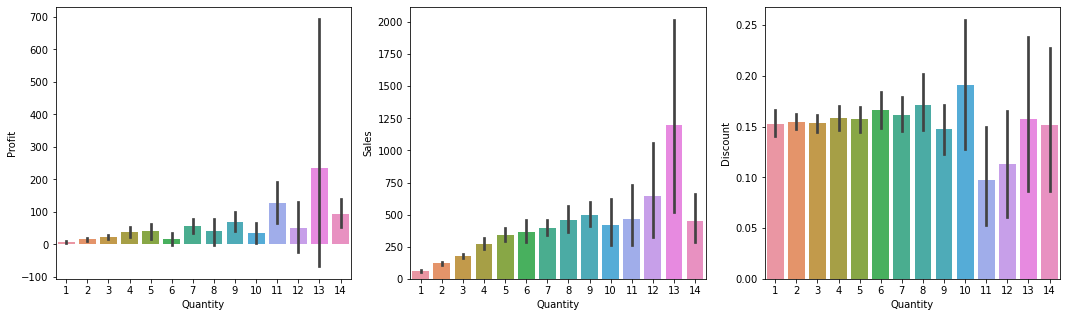

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x='Quantity', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Quantity', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data=df, ax=ax[2])
plt.show()

- quantity 13 is the highest in sales and profit but number 10 is the highest in discount and gain lower profit
- we need to balance between quantity and discount

## check discount with sales and profit

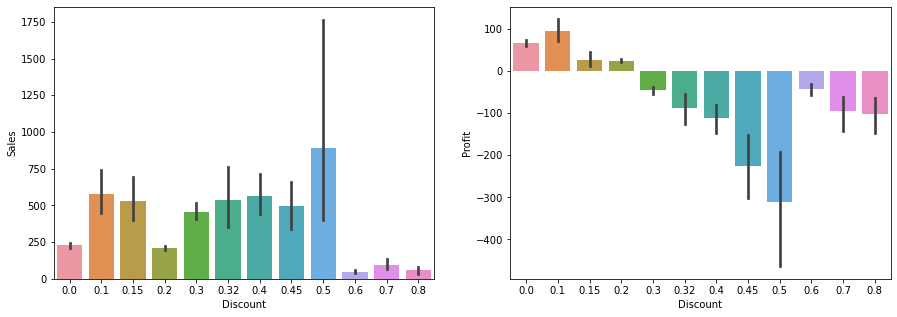

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Discount', y='Sales', data=df, ax=ax[0])
sns.barplot(x='Discount', y='Profit', data=df, ax=ax[1])
plt.show()

- We note that when the discount is high, the profit is negative

## Check Category and Sub-Category

### check number of each category

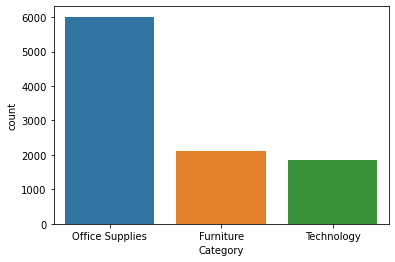

In [21]:
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index);

- Office Supplies has the highest number

### check number of each sub-category

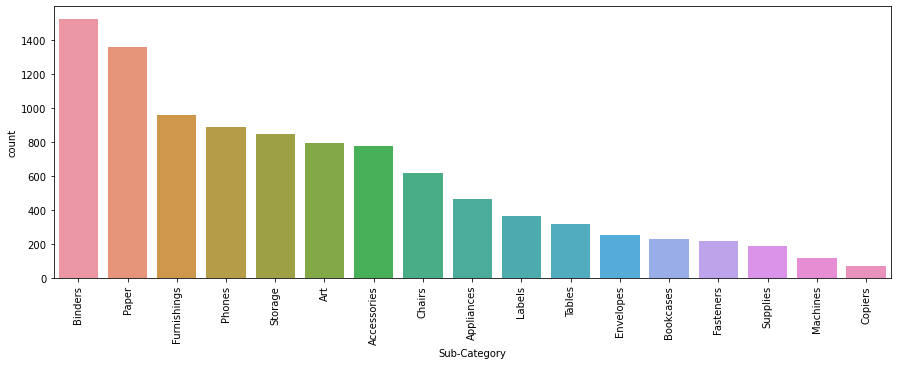

In [22]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index);
plt.xticks(rotation=90);
plt.show()

- Sales of Binders as Paper are the highest

### check category with discount and profit

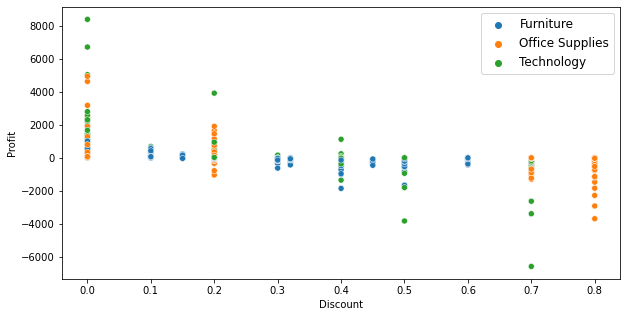

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df);
ax.legend(fontsize=12)
plt.show()

- Office Supplies has maximum loss at 80% discount
- Furniture and Technology have maximum loss between 30% to 50%
- Technology also has maximum loss profit at 70%

### check Sub-category with profit

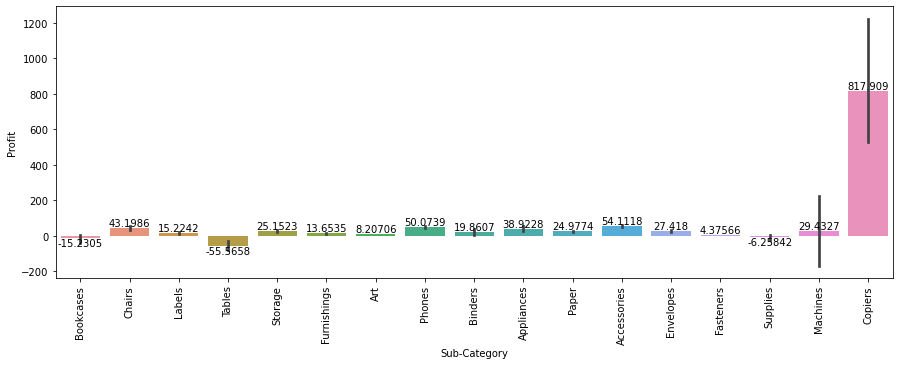

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Sub-Category', y='Profit', data=df);
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

- Tables and Supplies and Bookases have negative profit

## Analysis states

In [25]:
# group by with each state
states = df.groupby('State').sum().sort_values('Sales', ascending=False)
states.reset_index(inplace=True)

### check sales

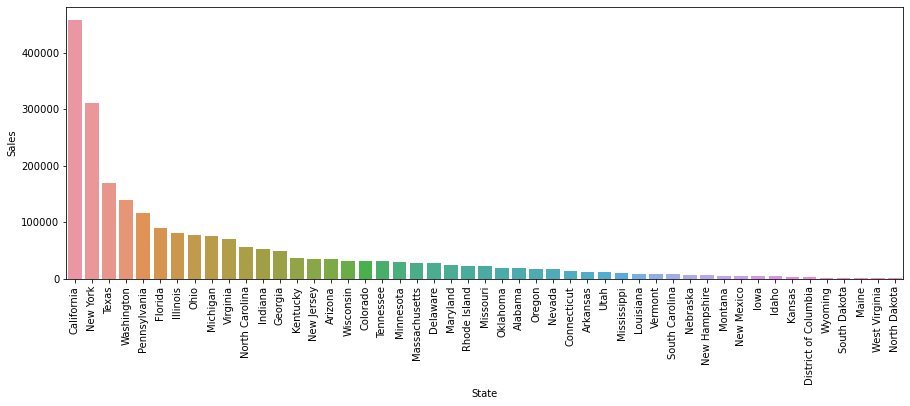

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Sales', data=states);
plt.xticks(rotation=90)
plt.show()

- California and New York have the maximum sales
- there are many state have lower sales

### Check Quantity

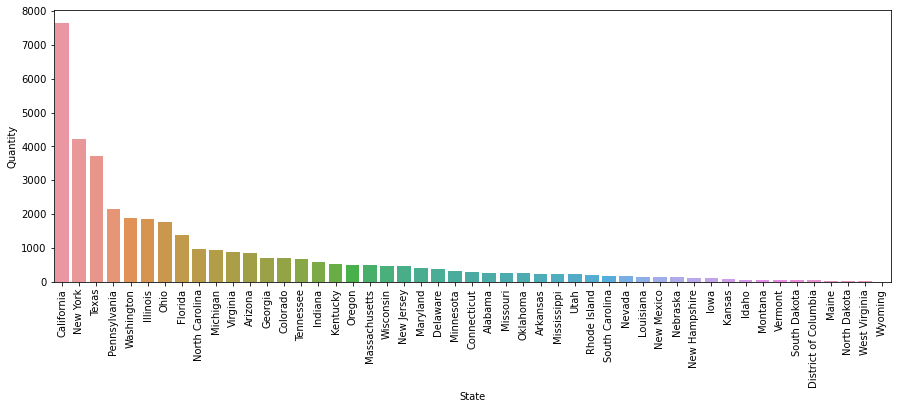

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
states = states.sort_values('Quantity', ascending=False)
sns.barplot(x='State', y='Quantity', data=states);
plt.xticks(rotation=90)
plt.show()

- In califonia and new york the pepole like to take more quantity of products at a time

### check Profit

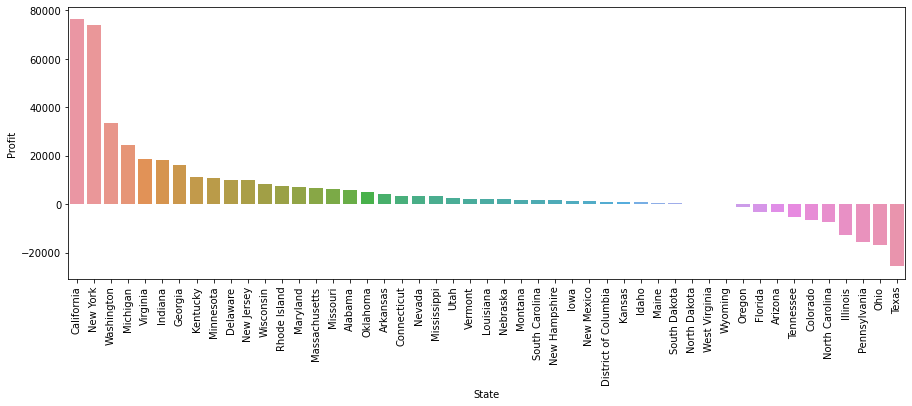

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
states = states.sort_values('Profit', ascending=False)
sns.barplot(x='State', y='Profit', data=states);
plt.xticks(rotation=90)
plt.show()

- California and New York have the highest profit
- there are states have a good sales but profit in negative

## check sales and profit for each state

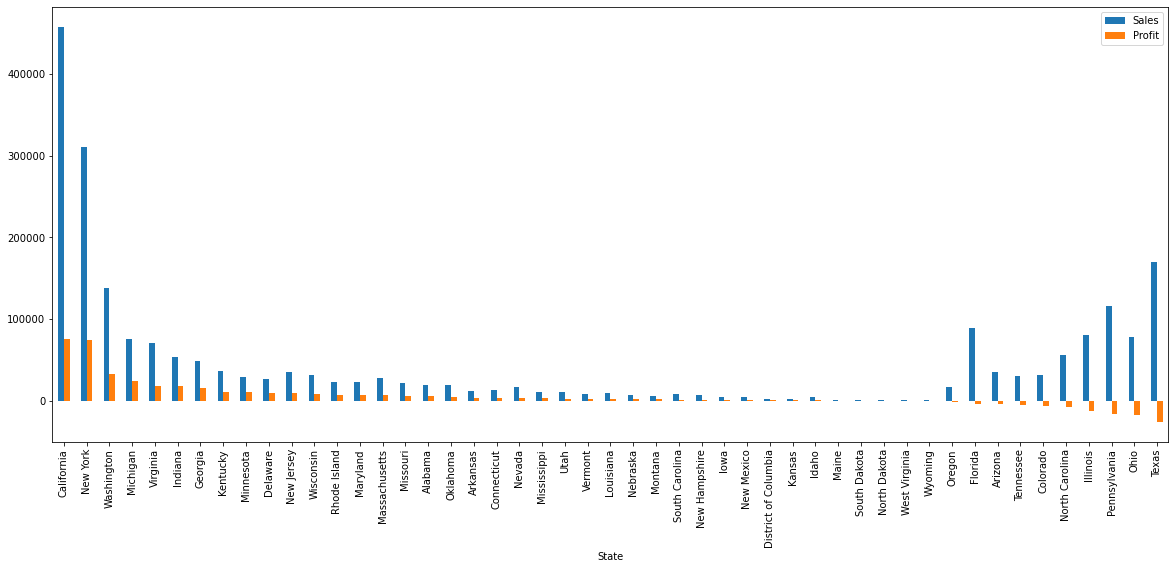

In [29]:
states= df.groupby(['State'])[['Sales', 'Profit']].sum()
states.sort_values("Profit", ascending=False).plot(kind = 'bar', figsize = (20,8))
plt.show()

- Not all good sales make a good profit

## Check discount for state

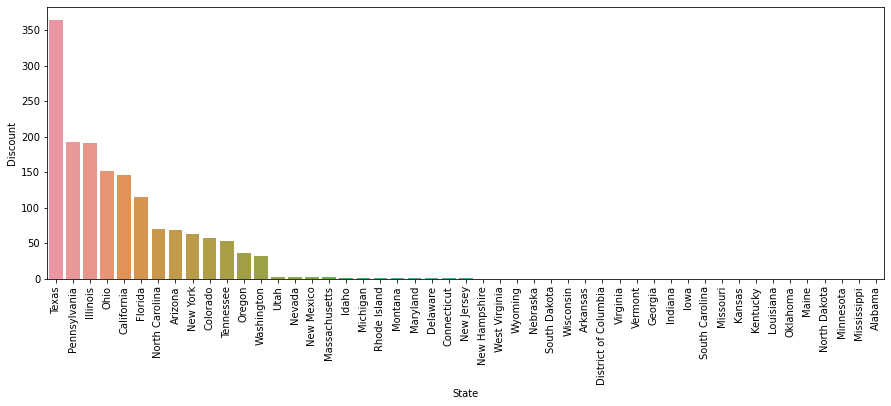

In [30]:
states= df.groupby(['State']).sum().sort_values('Discount', ascending=False)
states.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Discount', data=states)
plt.xticks(rotation=90)
plt.show();

- high discount sometimes cause to loss profit and we can see that

### Category to category

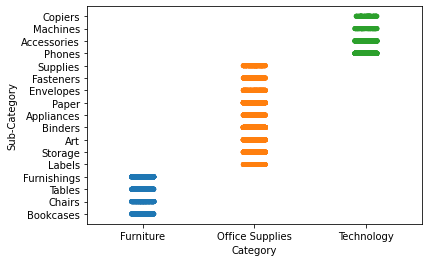

In [31]:
sns.stripplot(x="Category",y="Sub-Category",data=df)
plt.show()

- From this graph we can understand that different sub cateogries of categories

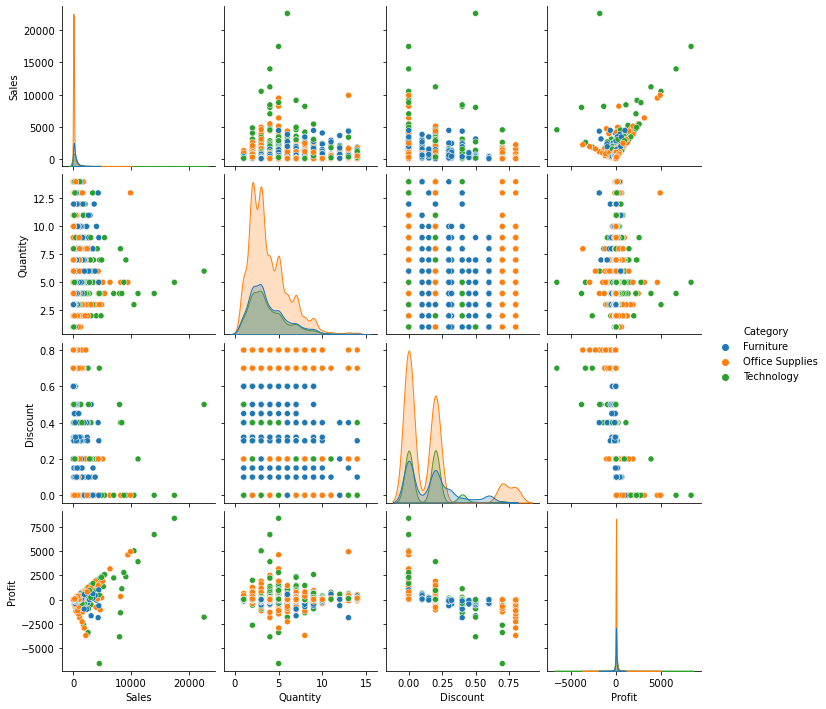

In [32]:
sns.pairplot(df,hue='Category')
plt.show()

-	The Technology category is high in sales, low in discounts, and high in profit.
-	The Furniture category is low in profit, high in discount, and compared to office supplies high in sales.
-	The Office supplies category is low in sales, compared to furniture high in profit and compared to technology high discount.

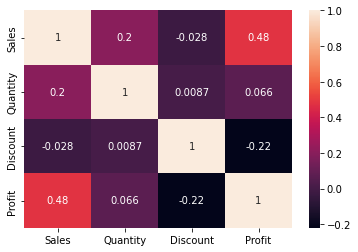

In [33]:
sns.heatmap(df.corr(),annot=True);

- From this heat map profit and sales having more correlation and then sales and quantity having the good correlation.

### Conclusion:

-	For each region:
    -	West region has the highest profit and finds the same region has the lowest discount
    -	South has the highest sales
    -	Central has the lowest profit and the highest discount, maybe that is why.
-	For each category:
    -	Furniture sales are high but have very low profit maybe a high discount is the reason.
-	For each segment:
    -	Home Office has the lowest discount but has also the highest profit as sales
-	For each ship mode:
    -	Same-day shipping has the highest sales
    -	First class has the highest discount but also the highest profit


-	Sales and Profit are not linear for most States
-	Central region needs more attention
-	Furniture and Office Supplies have high loss profit with high discount
-	Office Supplies has maximum loss at 80% and 0% discount
-	Furniture and Technology have a maximum loss between 30% to 50%
-	Technology also has maximum loss profit at 70%
-	Tables and Supplies and bookcases in the sub-category have negative profit


### Overall analysis and predictions:
-	Technology earns more profit compared to furniture
-	Same-day shipping earns high sales
-	West region has the highest profit
-	Vermont state has a good profit with low sales
-	Discount with 50% and less gain more profit
-	Need to give more discounts on Furniture to attract customers
-	In segment need to give more discount in Consumer and in Home-Office promote more for higher the profit
